[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fisamz/Repositorio_MCDAA/blob/main/Tarea2/Tarea2.ipynb)

# Tarea 2 — Preprocesamiento  
**Alumno:** Fisam Zavala  
**Dataset:** Mental Health and Lifestyle Habits (2019–2024)  
**Fuente:** [Kaggle – Atharva Soundankar](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024)


## Definición del conjunto de datos

Este conjunto de datos recopila información relacionada con **hábitos de vida y salud mental** entre 2019 y 2024.  
Busca analizar cómo factores como **rutinas de ejercicio, calidad del sueño, dieta, estrés y felicidad** se relacionan con el bienestar general.

Cada registro corresponde a una persona encuestada, con variables demográficas y de estilo de vida.

### Variables principales

| Columna | Descripción | Tipo de dato esperado |
|----------|--------------|----------------------|
| `Country` | País del encuestado | *string* |
| `Year` | Año de la encuesta | *int* |
| `Age Group` | Rango de edad (ej. 18–24, 25–34) | *string* |
| `Gender` | Género de la persona | *string* |
| `Sleep Hours` | Horas promedio de sueño por día | *float* |
| `Diet Quality` | Calidad de la dieta (Healthy, Moderate, Poor) | *string* |
| `Exercise Frequency` | Frecuencia semanal de ejercicio | *int* |
| `Social Interaction Level` | Nivel de socialización (High, Medium, Low) | *string* |
| `Stress Level` | Nivel de estrés (1–10) | *int* |
| `Anxiety Score` | Nivel de ansiedad (1–10) | *int* |
| `Happiness Index` | Nivel de felicidad (1–10) | *int* |

In [64]:
# === Importar librerías principales ===
import pandas as pd

# === Cargar el dataset ===
df = pd.read_csv("../Data/Mental_Health_Lifestyle_Dataset.csv")

# === Mostrar primeras filas ===
df.head()


,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


In [65]:
# Ver información general
df.dtypes

Country                         object
Age                              int64
Gender                          object
Exercise Level                  object
Diet Type                       object
Sleep Hours                    float64
Stress Level                    object
Mental Health Condition         object
Work Hours per Week              int64
Screen Time per Day (Hours)    float64
Social Interaction Score       float64
Happiness Score                float64
dtype: object

Los tipos de datos cargados por `pandas` son adecuados para cada variable.  
Las columnas categóricas fueron identificadas correctamente, y las variables numéricas (enteras y decimales) se detectaron con los tipos `int64` y `float64`, respectivamente.  
Por tanto, no fue necesario realizar conversiones adicionales.

In [66]:
# Crear una columna ID única para cada registro
df.insert(0, "ID", range(1, len(df) + 1))

# Reemplazar NaN por "None" en la columna Mental Health Condition
df["Mental Health Condition"] = df["Mental Health Condition"].fillna("None")

# Verificar
display ( df.head() )
display ( df["Mental Health Condition"].value_counts(dropna=False).head() )

,ID,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,1,Brazil,48,Male,Low,Vegetarian,6.3,Low,None,21,4.0,7.8,6.5
1,2,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,3,Japan,37,Female,Low,Vegetarian,7.2,High,None,43,4.7,9.6,9.7
3,4,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,5,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


Mental Health Condition
Anxiety       628
PTSD          624
None          595
Depression    580
Bipolar       573
Name: count, dtype: int64

In [67]:
filtro = (df["Mental Health Condition"] == "None") & (df["Happiness Score"] > 7)
df_none_happy = df.loc[filtro].copy()

# Checar tamaño y ver unas filas
len(df_none_happy), display ( df_none_happy.head() )

,ID,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
2,3,Japan,37,Female,Low,Vegetarian,7.2,High,None,43,4.7,9.6,9.7
11,12,Germany,36,Male,Low,Vegan,8.1,Low,None,54,7.9,2.7,8.0
56,57,India,22,Other,Moderate,Junk Food,3.8,Moderate,None,51,2.3,2.5,7.3
70,71,Australia,43,Female,High,Balanced,5.9,Moderate,None,59,5.2,4.0,8.9
78,79,Australia,34,Male,High,Balanced,6.7,Moderate,None,43,2.0,5.6,8.2


(192, None)

In [68]:
# Subconjunto por país
dfs_por_pais = {pais: df[df["Country"] == pais].copy() for pais in df["Country"].unique()}

display ( dfs_por_pais["Brazil"].head() )

list(dfs_por_pais.keys())[:10]  # ver algunos países disponibles


,ID,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,1,Brazil,48,Male,Low,Vegetarian,6.3,Low,None,21,4.0,7.8,6.5
3,4,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
7,8,Brazil,46,Other,Low,Vegetarian,6.3,High,PTSD,46,5.6,3.5,1.1
10,11,Brazil,40,Male,Moderate,Balanced,6.3,Low,PTSD,41,5.9,2.3,5.5
35,36,Brazil,21,Female,Moderate,Junk Food,5.1,Moderate,PTSD,33,2.8,4.1,6.9


['Brazil', 'Australia', 'Japan', 'Germany', 'India', 'Canada', 'USA']

In [69]:
# Creación de grupo resumen por país (promedios)

resumen_pais = (
    df.groupby("Country", as_index=False)
      .agg({
          "Happiness Score": "mean",
          "Sleep Hours": "mean",
          "Work Hours per Week": "mean",
          "Social Interaction Score": "mean"
      })
      .rename(columns={
          "Happiness Score": "Happiness_mean",
          "Sleep Hours": "Sleep_mean",
          "Work Hours per Week": "WorkHours_mean",
          "Social Interaction Score": "Social_mean"
      })
)

resumen_pais

,Country,Happiness_mean,Sleep_mean,WorkHours_mean,Social_mean
0,Australia,5.494240,6.411982,39.020737,5.369124
1,Brazil,5.335904,6.446024,39.156627,5.430843
2,Canada,5.559112,6.555607,38.943925,5.564720
3,Germany,5.368069,6.285644,39.042079,5.485396
4,India,5.378802,6.540783,39.905530,5.434793
5,Japan,5.279271,6.552164,40.070615,5.468337
6,USA,5.350448,6.523767,40.051570,5.536996


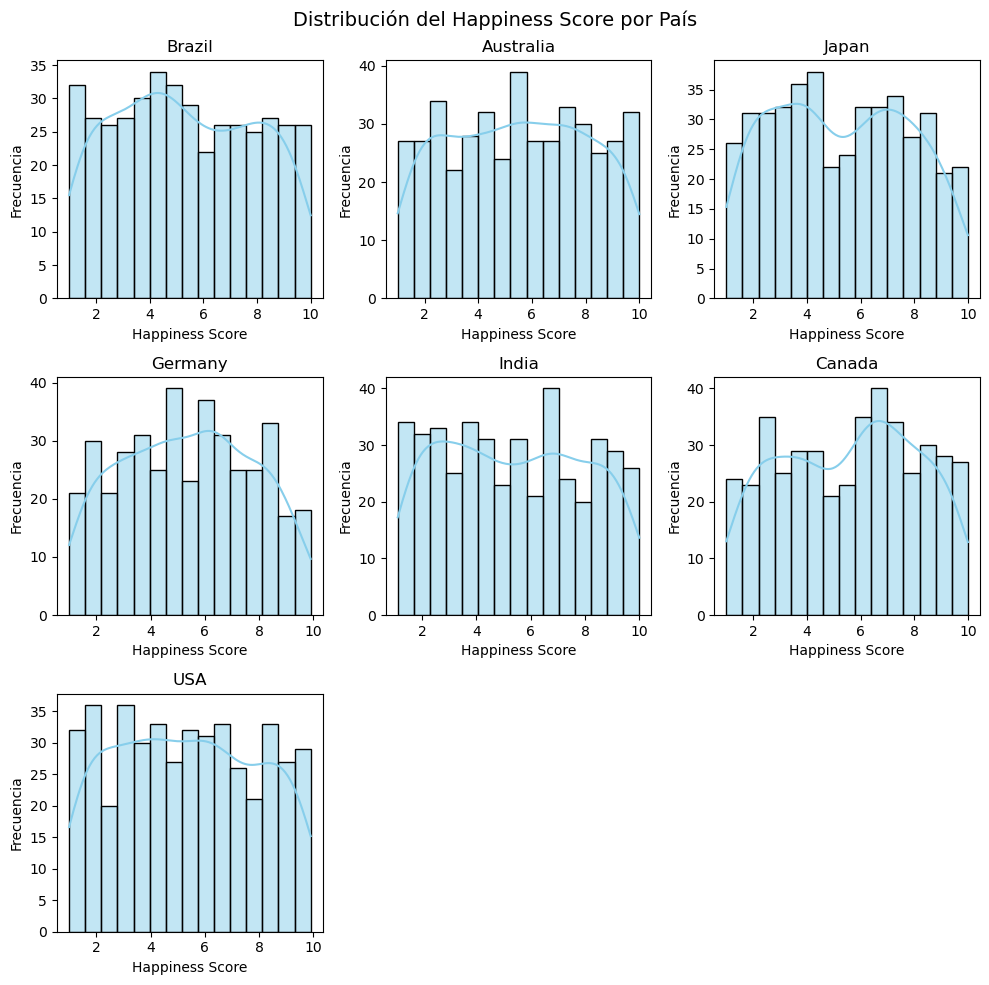

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener lista completa de países
countries = df["Country"].unique()

# Crear figura en formato 3x3
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

# Graficar cada país en su subplot
for i, country in enumerate(countries):
    sns.histplot(
        data=df[df["Country"] == country],
        x="Happiness Score",
        bins=15,
        kde=True,
        color="skyblue",
        ax=axes[i]
    )
    axes[i].set_title(country)
    axes[i].set_xlabel("Happiness Score")
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes vacíos si sobran
for j in range(len(countries), len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle("Distribución del Happiness Score por País", fontsize=14)
plt.tight_layout()
plt.show()
